### 📦 Step 1: Simulate Sample Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# simulate dataset
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'income': np.random.normal(50000, 15000, n),
    'debt_to_income': np.random.uniform(0.1, 0.6, n),
    'credit_utilization': np.random.uniform(0.1, 0.9, n),
    'num_open_accounts': np.random.randint(1, 10, n),
    'payment_history_score': np.random.uniform(0.5, 1.0, n),  # 1.0 = perfect history
})

In [3]:
df

,income,debt_to_income,credit_utilization,num_open_accounts,payment_history_score
0,57450.712295,0.183741,0.275255,9,0.775236
1,47926.035482,0.152284,0.129377,1,0.895007
2,59715.328072,0.418215,0.186421,2,0.658991
3,72845.447846,0.453238,0.371089,2,0.789866
4,46487.699379,0.115793,0.742069,6,0.672812
...,...,...,...,...,...
995,45783.495607,0.240342,0.801880,6,0.655358
996,76965.297903,0.203496,0.411524,4,0.757245
997,59612.642919,0.358286,0.533409,1,0.928418
998,41432.315153,0.102753,0.874453,7,0.733439


In [4]:
# Simulate default (target) using weighted factors
df['default'] = (
    (df['debt_to_income'] > 0.4).astype(int) +
    (df['credit_utilization'] > 0.7).astype(int) +
    (df['payment_history_score'] < 0.7).astype(int)
)

In [5]:
df

,income,debt_to_income,credit_utilization,num_open_accounts,payment_history_score,default
0,57450.712295,0.183741,0.275255,9,0.775236,0
1,47926.035482,0.152284,0.129377,1,0.895007,0
2,59715.328072,0.418215,0.186421,2,0.658991,2
3,72845.447846,0.453238,0.371089,2,0.789866,1
4,46487.699379,0.115793,0.742069,6,0.672812,2
...,...,...,...,...,...,...
995,45783.495607,0.240342,0.801880,6,0.655358,2
996,76965.297903,0.203496,0.411524,4,0.757245,0
997,59612.642919,0.358286,0.533409,1,0.928418,0
998,41432.315153,0.102753,0.874453,7,0.733439,1


In [6]:
# Simplify to binary: 0 = no default, 1 = default
df['default'] = (df['default'] > 1).astype(int)

In [7]:
df

,income,debt_to_income,credit_utilization,num_open_accounts,payment_history_score,default
0,57450.712295,0.183741,0.275255,9,0.775236,0
1,47926.035482,0.152284,0.129377,1,0.895007,0
2,59715.328072,0.418215,0.186421,2,0.658991,1
3,72845.447846,0.453238,0.371089,2,0.789866,0
4,46487.699379,0.115793,0.742069,6,0.672812,1
...,...,...,...,...,...,...
995,45783.495607,0.240342,0.801880,6,0.655358,1
996,76965.297903,0.203496,0.411524,4,0.757245,0
997,59612.642919,0.358286,0.533409,1,0.928418,0
998,41432.315153,0.102753,0.874453,7,0.733439,0


### 📊 Step 2: Train a Logistic Regression Model

|Factor | Weight | What It Means |
|--------|--------|--------||
Payment History | 35% | Have you paid on time|?|
Amounts Owed (Credit Utilization) | 30% | How much credit you're using vs limi|t|s
Length of Credit History | 15% | How long you’ve had credit accou|n|ts
Credit Mix | 10% | Different types of credit (loans, cards, mortg|a|ge)
New Credit / Inquiries | 10% | How often you apply for credit

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['income', 'debt_to_income', 'credit_utilization', 'num_open_accounts', 'payment_history_score']]
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities of default
probs = model.predict_proba(X_test_scaled)[:,1]
probs

array([2.86738338e-03, 4.34183335e-01, 2.07281790e-04, 3.52752918e-01,
       6.52185215e-04, 2.52379272e-01, 6.65163024e-01, 3.01819401e-01,
       1.09694160e-02, 4.21194079e-01, 1.81858722e-02, 9.93896991e-01,
       1.61918297e-02, 1.04324676e-02, 6.53918711e-01, 4.43908889e-01,
       1.34216240e-02, 6.97415892e-01, 1.32426022e-02, 4.88237770e-01,
       2.37183451e-02, 7.63305556e-04, 8.52561474e-01, 7.10594089e-01,
       3.35176072e-02, 2.63065164e-01, 2.58833556e-02, 9.30934403e-01,
       2.43893343e-03, 2.69606068e-01, 7.70345791e-02, 1.22347555e-02,
       3.14735041e-01, 4.14943748e-02, 6.25140039e-04, 6.88803132e-02,
       1.49143162e-01, 1.20622136e-02, 9.90544668e-01, 6.64718387e-01,
       1.09455111e-01, 5.20959749e-02, 3.53519144e-03, 8.16924300e-03,
       6.75620359e-01, 8.14811592e-01, 1.16021691e-02, 4.77806373e-04,
       1.69774795e-01, 8.42437655e-03, 2.83403524e-03, 1.25107907e-01,
       2.64760846e-01, 2.46173305e-01, 3.46206795e-03, 4.57505321e-01,
      

### 🎯 Step 3: Map Probabilities → Credit Scores

Use a scorecard-style transformation:

**score = OFFSET - FACTOR × log(odds)**

Where:

odds = (1 - p) / p

FACTOR and OFFSET set the score range

Let’s map:

- p = 0.5 → score = 600 (baseline)
- every doubling of odds = +20 points

In [9]:
np.log(2)

0.6931471805599453

In [10]:
import matplotlib.pyplot as plt

# Scorecard formula parameters
BASE_ODDS = 1 # odds when p=0.5
BASE_SCORE = 600
POINTS_TO_DOUBLE_ODDS = 20

# Calculate the factor and the offset
FACTOR = POINTS_TO_DOUBLE_ODDS / np.log(2)
OFFSET = BASE_SCORE + FACTOR*np.log(BASE_ODDS)

# Convert probabilites to odds and scores
odds = (1-probs)/probs
scores1 = OFFSET - FACTOR*np.log(odds)
scores = OFFSET - FACTOR*np.log(odds)

# Clip scores to traditional FICO range
scores = np.clip(scores, 300, 850)

# View a few results
result_df = X_test.copy()
result_df['default_prob'] = probs
result_df['credit_score'] = scores.round(0)

print(result_df[['default_prob', 'credit_score']].head())

     default_prob  credit_score
521      0.002867         431.0
737      0.434183         592.0
740      0.000207         355.0
660      0.352753         582.0
411      0.000652         388.0


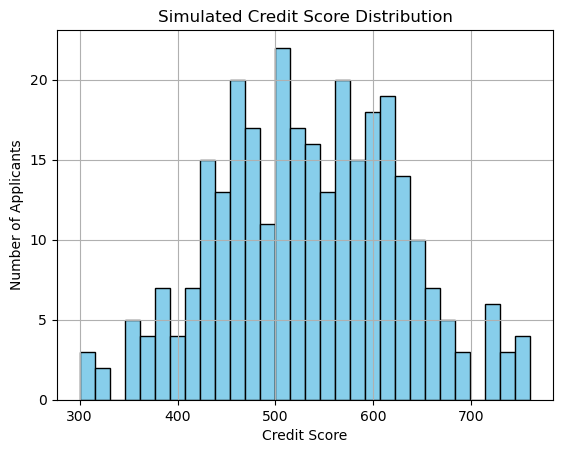

In [11]:
plt.hist(scores, bins=30, color='skyblue', edgecolor='black')
plt.title("Simulated Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Number of Applicants")
plt.grid(True)
plt.show()

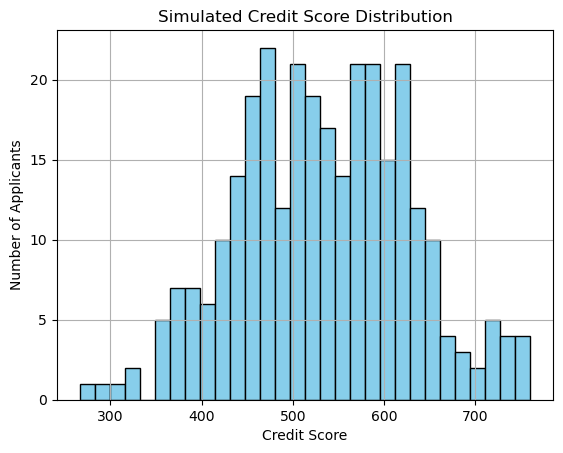

In [12]:
plt.hist(scores1, bins=30, color='skyblue', edgecolor='black')
plt.title("Simulated Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Number of Applicants")
plt.grid(True)
plt.show()

### 🏦 How Credit Scoring Helps Determine Credit Limits

Credit scores don’t **directly** determine credit limits, but they play a **major role** in **risk-based credit limit assignment**.

🔗 The Relationship:
Higher credit score = Lower risk = Higher potential credit limit

Lenders want to:

- **Avoid lending too much** to risky customers
- **Maximize lending** to low-risk customers (because they earn interest, fees, etc.)

So, your **credit score is used as a proxy for risk**, and that risk determines **how much credit a lender is comfortable extending**.

### 🔧 Credit Limit Determination: Typical Steps

#### **1. Score the applicant**
Using credit scoring models (like FICO or internal ML models), estimate the probability of default (PD).

#### **2. Assign a risk grade or segment**
Group users into bands or buckets, like:

|Score Range|Risk Level|Max Credit Limit|
|---|---|---|
|750–850|Very Low Risk|20000|
|700–749|Low Risk|10000 |
|650–699|Medium Risk|5000|
|less than 650|High Risk|500 to 2000|

#### **3. Factor in income & DTI**
Combine credit score with:

- **Income** (higher = more repayment capacity)
- **Debt-to-Income ratio** (DTI) (lower = safer to lend)
- **Existing obligations** (e.g., current loan balances)

*Example rule:*
*Max Credit Limit = min(40% of annual income, limit cap for score band)* or score band)*
= min(40% of annual income, limit *cap for score band)

### 🧠 Example: Custom Credit Limit Model

###### Simplified pseudo-code
credit_limit = f(credit_score, income, dti, utilization, age, employment_length

Or segment it using rules + score tiers, like:),000

In [16]:
def calculate_limit(score, income, dti):
    if score > 750 and dti < 0.3:
        return min(income * 0.5, 20000)
    elif score > 700:
        return min(income * 0.4, 10000)
    elif score > 650:
        return min(income * 0.3, 5000)
    else:
        return 1000

In [17]:
result_df[['default_prob', 'credit_score']].sample()

,default_prob,credit_score
49,0.596677,611.0


In [18]:
result_df[['default_prob', 'credit_score']].sample()

,default_prob,credit_score
429,0.004452,444.0


In [19]:
calculate_limit(579.0, 50000, 0.5)

1000